In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PRE

[[0, 0, 0.197], [1, 0, 0.1993], [2, 0, 0.2012], [2, 0, 0.17], [1, 0, 0.17], [0, 0, 0.17]]
[[0, 1, 0.2377], [1, 1, 0.2424], [2, 1, 0.2406], [2, 1, 0.17], [1, 1, 0.17], [0, 1, 0.17]]
[[0, 2, 0.2548], [1, 2, 0.2591], [2, 2, 0.2558], [2, 2, 0.17], [1, 2, 0.17], [0, 2, 0.17]]
[[0, 3, 0.2593], [1, 3, 0.2755], [2, 3, 0.2742], [2, 3, 0.17], [1, 3, 0.17], [0, 3, 0.17]]
[[0, 4, 0.3476], [1, 4, 0.346], [2, 4, 0.3466], [2, 4, 0.17], [1, 4, 0.17], [0, 4, 0.17]]


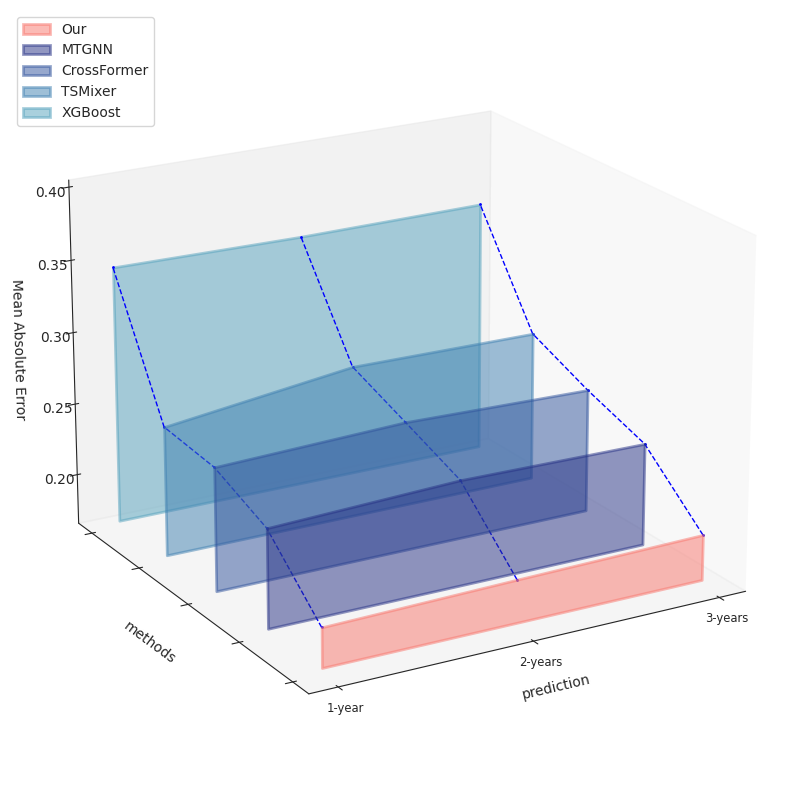

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns

sns.set_style("white")

methods = ["Our", "MTGNN", "CrossFormer", "TSMixer", "XGBoost"]
metrics = ["1-year", "2-years", "3-years"]
value = np.array([
                  [0.1970, 0.1993, 0.2012],
                  [0.2377, 0.2424, 0.2406],
                  [0.2548, 0.2591, 0.2558],
                  [0.2593, 0.2755, 0.2742],
                  [0.3476, 0.3460, 0.3466]])

# 数据准备
y = np.arange(len(methods))
x = np.arange(len(metrics))

# 创建网格
x, y = np.meshgrid(x, y)

# 创建图形
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
# color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]
color_palette = ["#F8766D", "#263185", "#30539C", "#3F80B1", "#55A2BD", "#76BCBC", "#A3D4BC", "#D4EABA"]
# 绘制线框图
for i in range(value.shape[0]):
    tmp1 = [ list(j) for j in zip(x[i],y[i],value[i])]
    tmp2 = [ list(j) for j in zip(x[i], y[i], np.ones_like(x[i])*0.17)]
    verts = tmp1 + tmp2[::-1]
    print(verts)
    ax.add_collection3d(Poly3DCollection([np.array(verts)], alpha=0.5, linewidth=2, color=color_palette[i],label=methods[i]))

for i in range(value.shape[1]):
    ax.plot(x[:,i], y[:, i], value[:,i], color='blue', marker='o', markersize=1, linestyle='--',linewidth=1)
    
    # ax.plot(Round[i] * np.ones_like(A1), A1, Coop_rate[:, i], color='black', marker='o', markersize=5, linestyle='-')
    # ax.fill_between(Round[i] * np.ones_like(A1), A1, Coop_rate[:, i], color='black', marker='o', markersize=5, linestyle='-')

# 设置轴标签和标题
ax.set_ylabel('methods')
ax.set_xlabel('prediction')
ax.set_zlabel("Mean Absolute Error")
ax.set_xticks(np.arange(len(metrics)))
ax.set_yticks(np.arange(len(methods)))
ax.tick_params(axis='both', which='major', pad=0)
ax.set_xticklabels(metrics,  fontsize="small")
ax.set_yticklabels([],  fontsize="small", rotation=10)
ax.view_init(20,240)
ax.set_zlim(0.17,0.4)
ax.grid(False)

plt.legend(loc=2, prop={'size': 10})
# 显示图形   
plt.show()

MEXICO

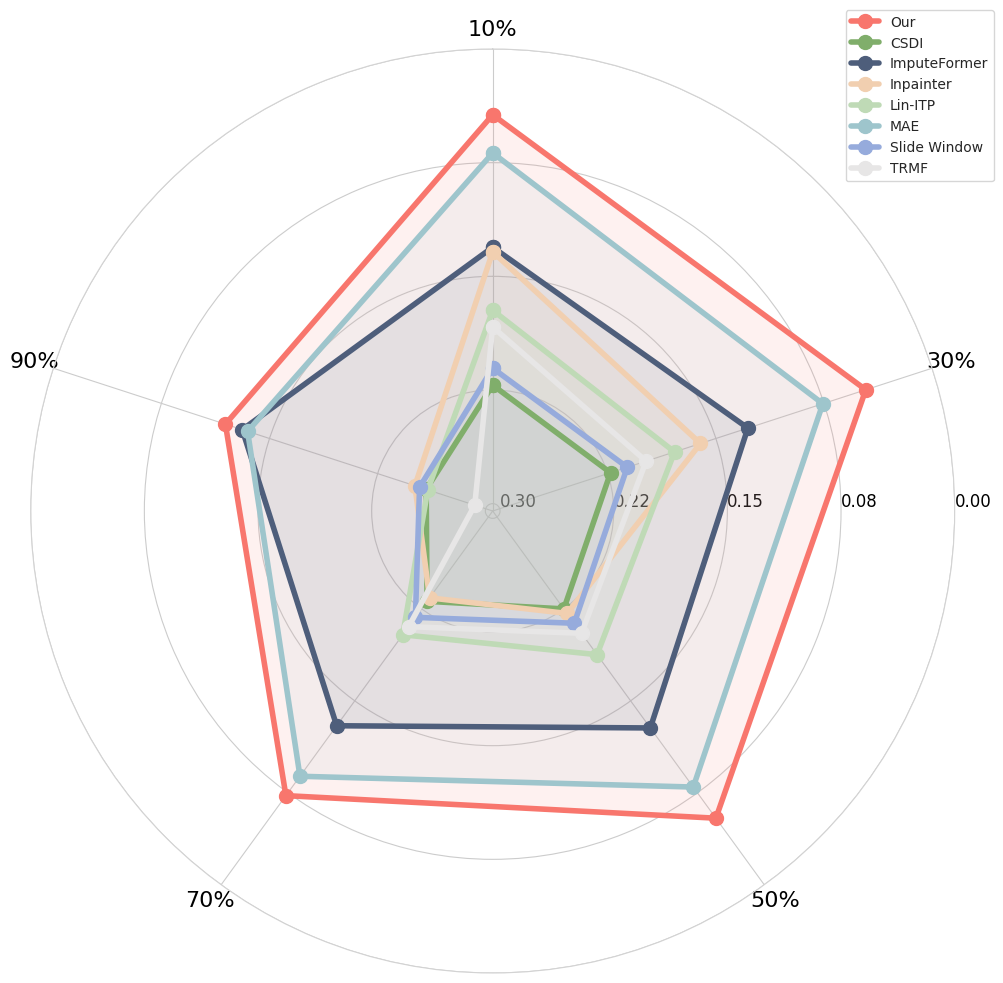

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["Our", "CSDI", "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0434, 0.0460, 0.0543, 0.0727, 0.1194],
                  [0.2218, 0.2231, 0.2250, 0.2312, 0.2587],
                  [0.1308, 0.1278, 0.1279, 0.1297, 0.1311],
                  [0.1338, 0.1607, 0.2213, 0.2340, 0.2509],
                  [0.1724, 0.1787, 0.1877, 0.2039, 0.2598],
                  [0.0686, 0.0758, 0.0797, 0.0885, 0.1348],
                  [0.2106, 0.2115, 0.2133, 0.2181, 0.2541],
                  [0.1834, 0.1984, 0.2051, 0.2105, 0.2924]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]
    # color_palette = ["#F8766D", "#263185", "#3D7FB1",  "#76BCBC", "#A3D4BC", "#D4EABA", "#F0F7BD","#FFFEDE"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 5), np.linspace(0.3, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[1 1 1 1 1]
 [8 8 8 7 6]
 [3 3 3 3 2]
 [4 4 7 8 4]
 [5 5 4 4 7]
 [2 2 2 2 3]
 [7 7 6 6 5]
 [6 6 5 5 8]]


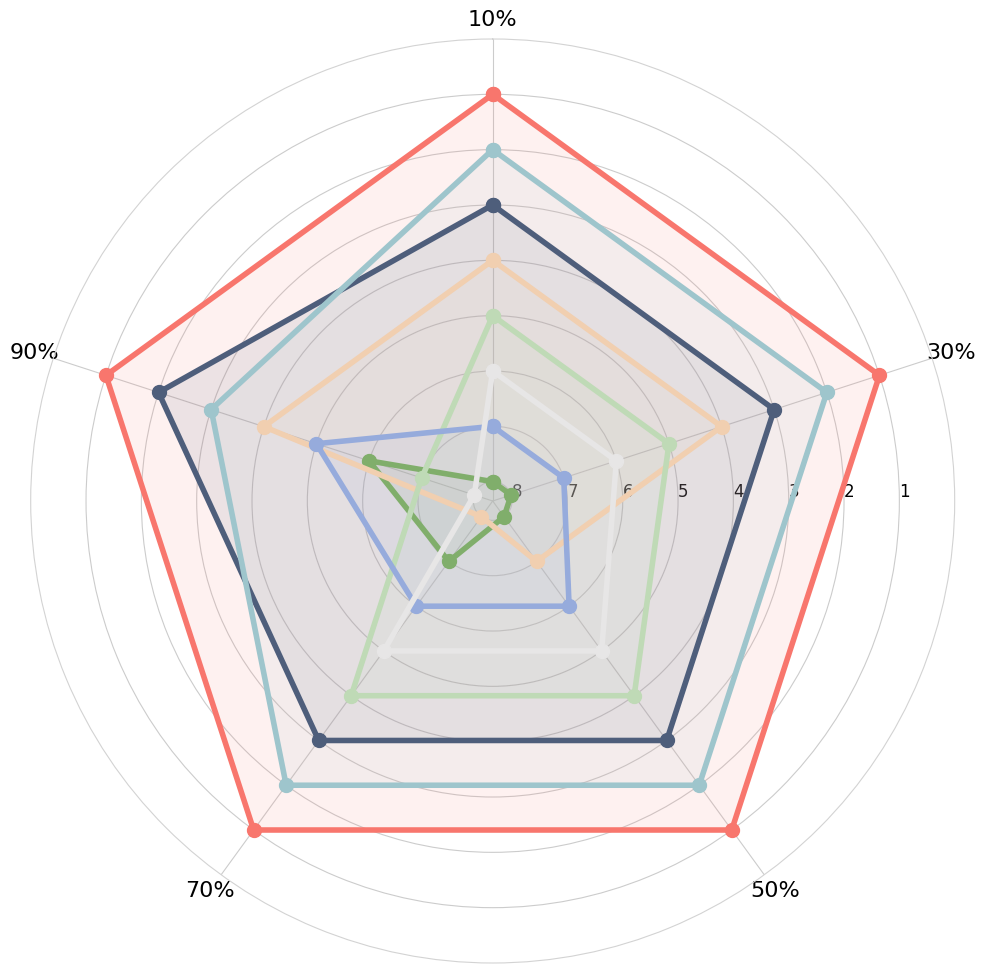

In [7]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

[[0, 0, 0.0434], [1, 0, 0.046], [2, 0, 0.0543], [3, 0, 0.0727], [4, 0, 0.1194], [4, 0, 0], [3, 0, 0], [2, 0, 0], [1, 0, 0], [0, 0, 0]]
[[0, 1, 0.0686], [1, 1, 0.0758], [2, 1, 0.0797], [3, 1, 0.0885], [4, 1, 0.1348], [4, 1, 0], [3, 1, 0], [2, 1, 0], [1, 1, 0], [0, 1, 0]]
[[0, 2, 0.1308], [1, 2, 0.1278], [2, 2, 0.1279], [3, 2, 0.1297], [4, 2, 0.1311], [4, 2, 0], [3, 2, 0], [2, 2, 0], [1, 2, 0], [0, 2, 0]]
[[0, 3, 0.2218], [1, 3, 0.2231], [2, 3, 0.225], [3, 3, 0.2312], [4, 3, 0.2587], [4, 3, 0], [3, 3, 0], [2, 3, 0], [1, 3, 0], [0, 3, 0]]
[[0, 4, 0.1338], [1, 4, 0.1607], [2, 4, 0.2213], [3, 4, 0.234], [4, 4, 0.2509], [4, 4, 0], [3, 4, 0], [2, 4, 0], [1, 4, 0], [0, 4, 0]]
[[0, 5, 0.1724], [1, 5, 0.1787], [2, 5, 0.1877], [3, 5, 0.2039], [4, 5, 0.2598], [4, 5, 0], [3, 5, 0], [2, 5, 0], [1, 5, 0], [0, 5, 0]]
[[0, 6, 0.2106], [1, 6, 0.2115], [2, 6, 0.2133], [3, 6, 0.2181], [4, 6, 0.2541], [4, 6, 0], [3, 6, 0], [2, 6, 0], [1, 6, 0], [0, 6, 0]]
[[0, 7, 0.1834], [1, 7, 0.1984], [2, 7, 0.2051], [3

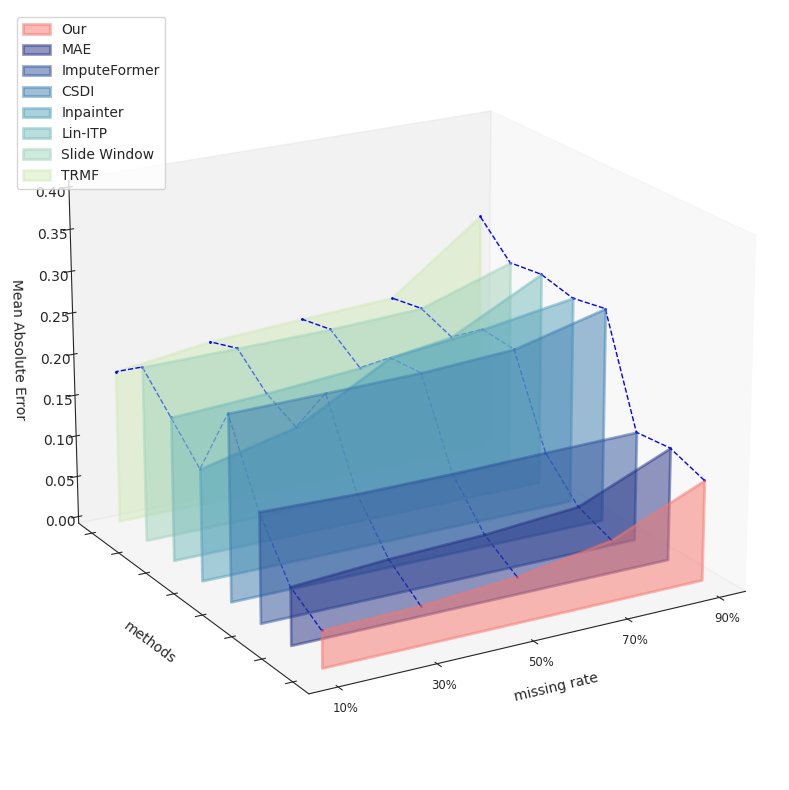

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns

sns.set_style("white")

methods = ["Our", "MAE", "ImputeFormer", "CSDI", "Inpainter", "Lin-ITP", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0434, 0.0460, 0.0543, 0.0727, 0.1194],
                  [0.0686, 0.0758, 0.0797, 0.0885, 0.1348],
                  [0.1308, 0.1278, 0.1279, 0.1297, 0.1311],
                  [0.2218, 0.2231, 0.2250, 0.2312, 0.2587],
                  [0.1338, 0.1607, 0.2213, 0.2340, 0.2509],
                  [0.1724, 0.1787, 0.1877, 0.2039, 0.2598],
                  [0.2106, 0.2115, 0.2133, 0.2181, 0.2541],
                  [0.1834, 0.1984, 0.2051, 0.2105, 0.2924]])

# 数据准备
y = np.arange(len(methods))
x = np.arange(len(metrics))

# 创建网格
x, y = np.meshgrid(x, y)

# 创建图形
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
# color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]
color_palette = ["#F8766D", "#263185", "#30539C", "#3F80B1", "#55A2BD", "#76BCBC", "#A3D4BC", "#D4EABA"]
# 绘制线框图
for i in range(value.shape[0]):
    tmp1 = [ list(j) for j in zip(x[i],y[i],value[i])]
    tmp2 = [ list(j) for j in zip(x[i], y[i], np.zeros_like(x[i]))]
    verts = tmp1 + tmp2[::-1]
    print(verts)
    ax.add_collection3d(Poly3DCollection([np.array(verts)], alpha=0.5, linewidth=2, color=color_palette[i],label=methods[i]))

for i in range(value.shape[1]):
    ax.plot(x[:,i], y[:, i], value[:,i], color='blue', marker='o', markersize=1, linestyle='--',linewidth=1)
    
    # ax.plot(Round[i] * np.ones_like(A1), A1, Coop_rate[:, i], color='black', marker='o', markersize=5, linestyle='-')
    # ax.fill_between(Round[i] * np.ones_like(A1), A1, Coop_rate[:, i], color='black', marker='o', markersize=5, linestyle='-')

# 设置轴标签和标题
ax.set_ylabel('methods')
ax.set_xlabel('missing rate')
ax.set_zlabel("Mean Absolute Error")
ax.set_xticks(np.arange(len(metrics)))
ax.set_yticks(np.arange(len(methods)))
ax.tick_params(axis='both', which='major', pad=0)
ax.set_xticklabels(metrics,  fontsize="small")
ax.set_yticklabels([],  fontsize="small", rotation=10)
ax.view_init(20,240)
ax.set_zlim(0,0.4)
ax.grid(False)

plt.legend(loc=2, prop={'size': 10})
# 显示图形   
plt.show()

Chesapeake

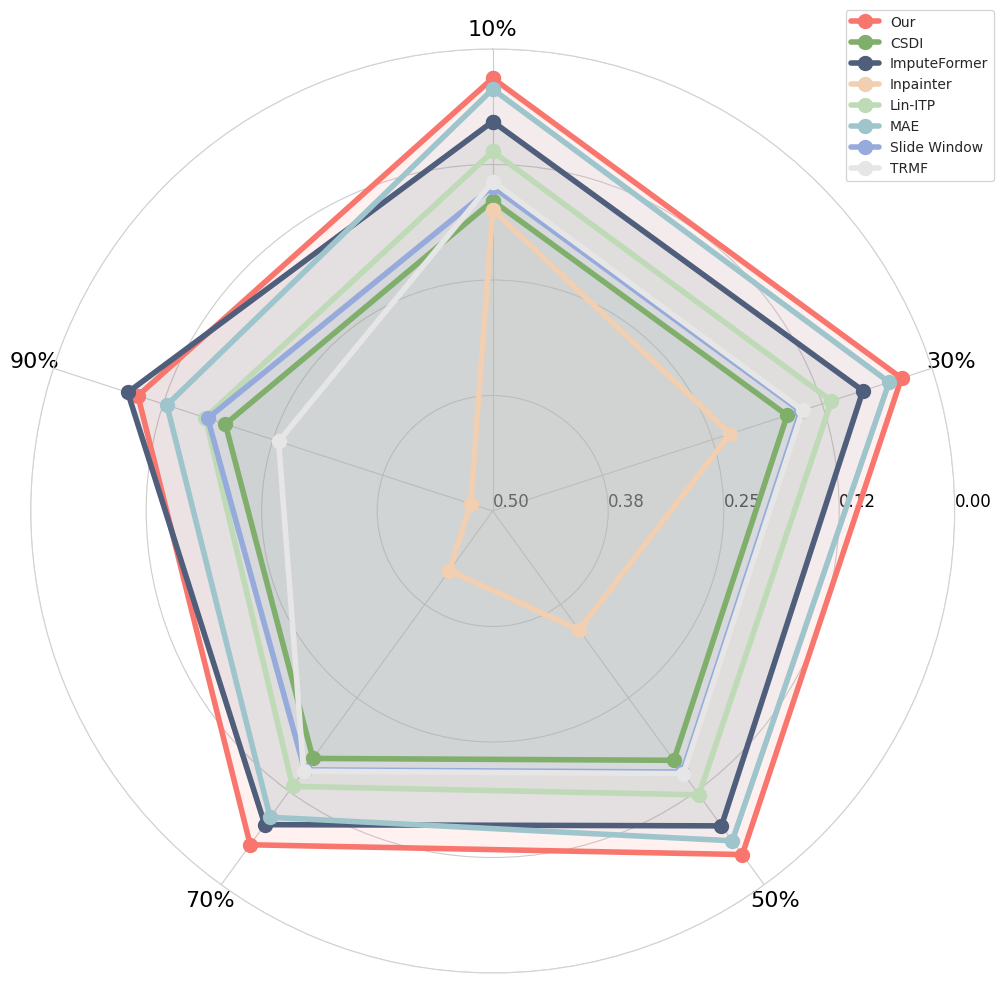

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["Our", "CSDI", "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0316, 0.0348, 0.0404, 0.0535, 0.0963],
                  [0.1643, 0.1649, 0.1665, 0.1690, 0.1958],
                  [0.0785, 0.0787, 0.0788, 0.0804, 0.0847],
                  [0.1740, 0.2297, 0.3410, 0.4201, 0.4749],
                  [0.1109, 0.1145, 0.1203, 0.1316, 0.1730],
                  [0.0435, 0.0489, 0.0588, 0.0903, 0.1292],
                  [0.1490, 0.1497, 0.1508, 0.1537, 0.1757],
                  [0.1434, 0.1473, 0.1487, 0.1519, 0.2564]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.5, 0, 5), np.linspace(0.5, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[1 1 1 1 2]
 [7 7 7 7 6]
 [3 3 3 2 1]
 [8 8 8 8 8]
 [4 4 4 4 4]
 [2 2 2 3 3]
 [6 6 6 6 5]
 [5 5 5 5 7]]


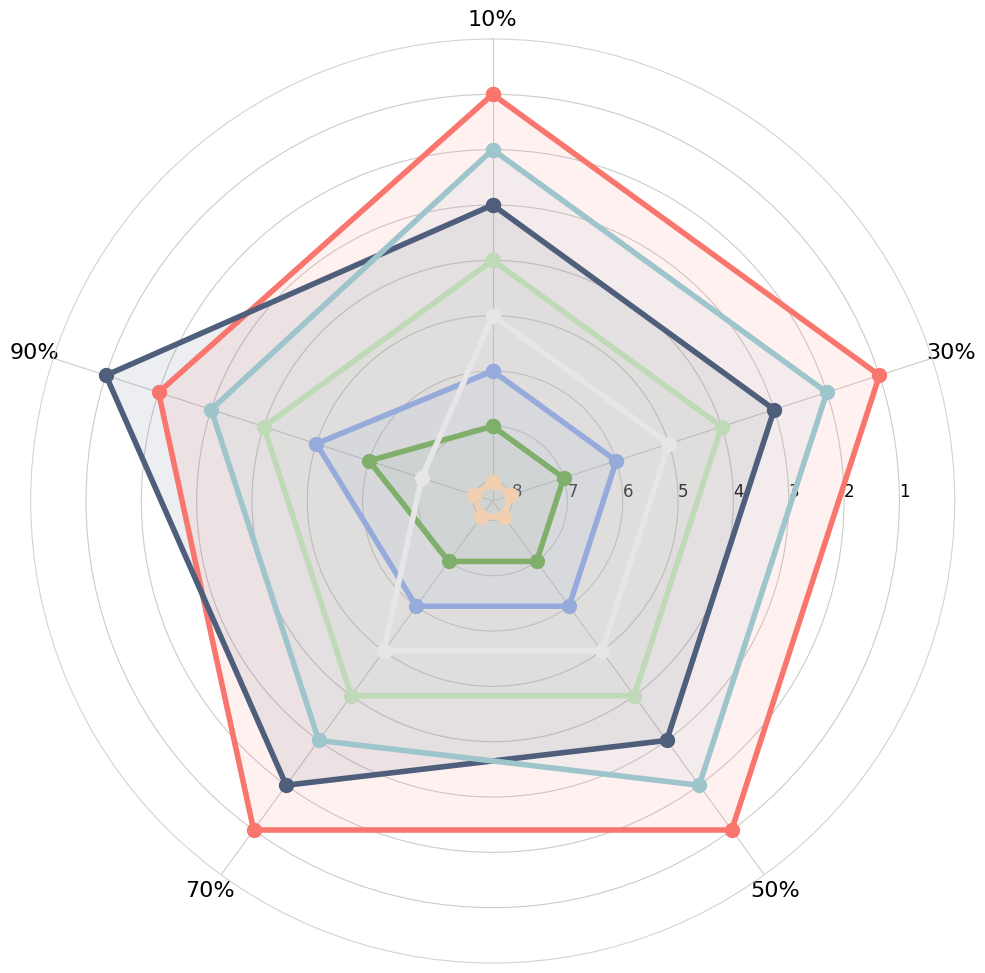

In [14]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

[[0, 0, 0.0316], [1, 0, 0.0348], [2, 0, 0.0404], [3, 0, 0.0535], [4, 0, 0.0963], [4, 0, 0], [3, 0, 0], [2, 0, 0], [1, 0, 0], [0, 0, 0]]
[[0, 1, 0.0435], [1, 1, 0.0489], [2, 1, 0.0588], [3, 1, 0.0903], [4, 1, 0.1292], [4, 1, 0], [3, 1, 0], [2, 1, 0], [1, 1, 0], [0, 1, 0]]
[[0, 2, 0.0785], [1, 2, 0.0787], [2, 2, 0.0788], [3, 2, 0.0804], [4, 2, 0.0847], [4, 2, 0], [3, 2, 0], [2, 2, 0], [1, 2, 0], [0, 2, 0]]
[[0, 3, 0.1643], [1, 3, 0.1649], [2, 3, 0.1665], [3, 3, 0.169], [4, 3, 0.1958], [4, 3, 0], [3, 3, 0], [2, 3, 0], [1, 3, 0], [0, 3, 0]]
[[0, 4, 0.174], [1, 4, 0.2297], [2, 4, 0.341], [3, 4, 0.4201], [4, 4, 0.4749], [4, 4, 0], [3, 4, 0], [2, 4, 0], [1, 4, 0], [0, 4, 0]]
[[0, 5, 0.1109], [1, 5, 0.1145], [2, 5, 0.1203], [3, 5, 0.1316], [4, 5, 0.173], [4, 5, 0], [3, 5, 0], [2, 5, 0], [1, 5, 0], [0, 5, 0]]
[[0, 6, 0.149], [1, 6, 0.1497], [2, 6, 0.1508], [3, 6, 0.1537], [4, 6, 0.1757], [4, 6, 0], [3, 6, 0], [2, 6, 0], [1, 6, 0], [0, 6, 0]]
[[0, 7, 0.1434], [1, 7, 0.1473], [2, 7, 0.1487], [3, 

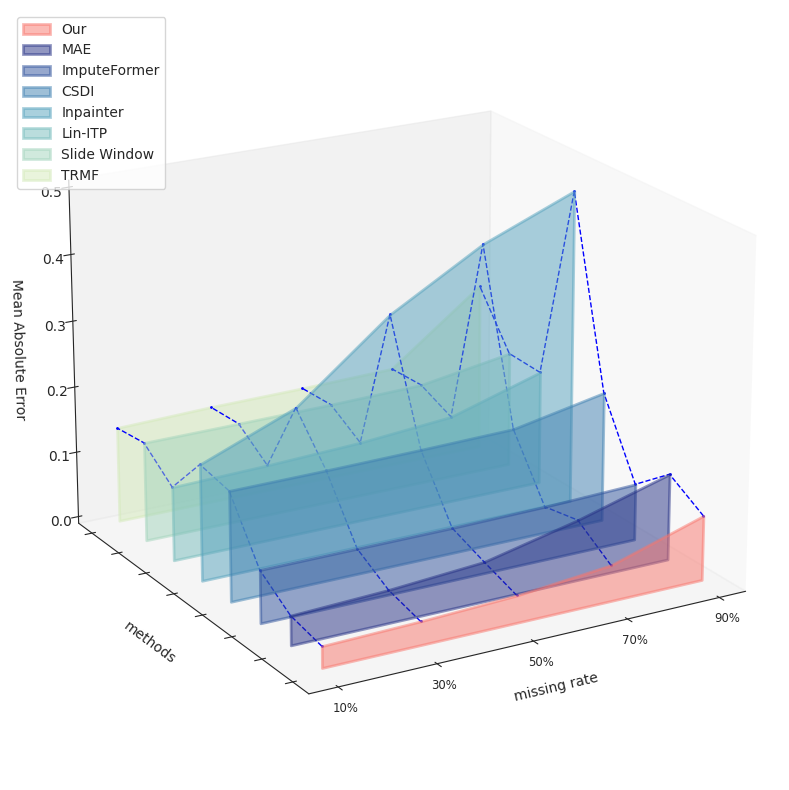

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns

sns.set_style("white")

methods = ["Our", "MAE", "ImputeFormer", "CSDI", "Inpainter", "Lin-ITP", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0316, 0.0348, 0.0404, 0.0535, 0.0963],
                  [0.0435, 0.0489, 0.0588, 0.0903, 0.1292],
                  [0.0785, 0.0787, 0.0788, 0.0804, 0.0847],
                  [0.1643, 0.1649, 0.1665, 0.1690, 0.1958],
                  [0.1740, 0.2297, 0.3410, 0.4201, 0.4749],
                  [0.1109, 0.1145, 0.1203, 0.1316, 0.1730],
                  [0.1490, 0.1497, 0.1508, 0.1537, 0.1757],
                  [0.1434, 0.1473, 0.1487, 0.1519, 0.2564]])

# 数据准备
y = np.arange(len(methods))
x = np.arange(len(metrics))

# 创建网格
x, y = np.meshgrid(x, y)

# 创建图形
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
# color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]
color_palette = ["#F8766D", "#263185", "#30539C", "#3F80B1", "#55A2BD", "#76BCBC", "#A3D4BC", "#D4EABA"]
# 绘制线框图
for i in range(value.shape[0]):
    tmp1 = [ list(j) for j in zip(x[i],y[i],value[i])]
    tmp2 = [ list(j) for j in zip(x[i], y[i], np.zeros_like(x[i]))]
    verts = tmp1 + tmp2[::-1]
    print(verts)
    ax.add_collection3d(Poly3DCollection([np.array(verts)], alpha=0.5, linewidth=2, color=color_palette[i],label=methods[i]))

for i in range(value.shape[1]):
    ax.plot(x[:,i], y[:, i], value[:,i], color='blue', marker='o', markersize=1, linestyle='--',linewidth=1)
    
    # ax.plot(Round[i] * np.ones_like(A1), A1, Coop_rate[:, i], color='black', marker='o', markersize=5, linestyle='-')
    # ax.fill_between(Round[i] * np.ones_like(A1), A1, Coop_rate[:, i], color='black', marker='o', markersize=5, linestyle='-')

# 设置轴标签和标题
ax.set_ylabel('methods')
ax.set_xlabel('missing rate')
ax.set_zlabel("Mean Absolute Error")
ax.set_xticks(np.arange(len(metrics)))
ax.set_yticks(np.arange(len(methods)))
ax.tick_params(axis='both', which='major', pad=0)
ax.set_xticklabels(metrics,  fontsize="small")
ax.set_yticklabels([],  fontsize="small", rotation=10)
ax.view_init(20,240)
ax.set_zlim(0,0.5)
ax.grid(False)

plt.legend(loc=2, prop={'size': 10})
# 显示图形   
plt.show()

Yangtze

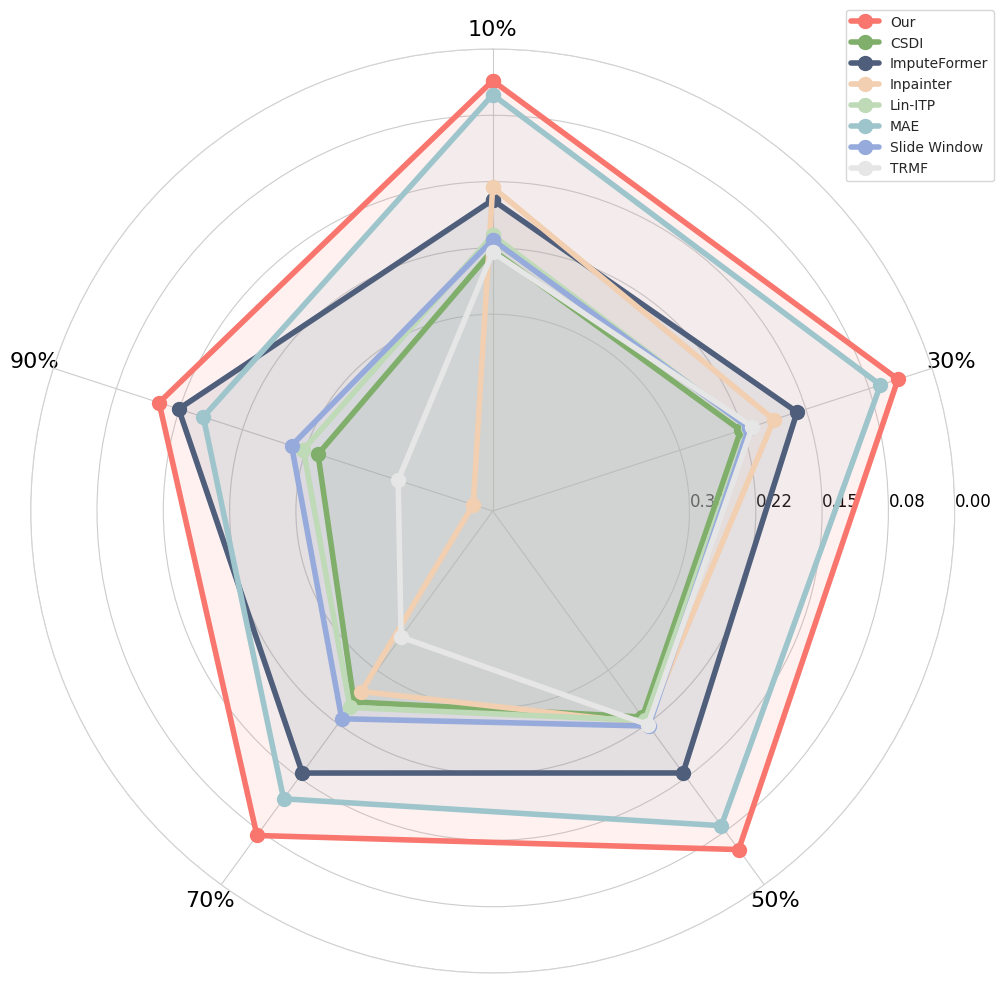

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["Our", "CSDI", "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0359, 0.0406, 0.0492, 0.0689, 0.1258],
                  [0.2274, 0.2276, 0.2345, 0.2556, 0.3148],
                  [0.1708, 0.1606, 0.1563, 0.1562, 0.1491],
                  [0.1564, 0.1883, 0.2258, 0.2701, 0.4994],
                  [0.2108, 0.2187, 0.2297, 0.2479, 0.2975],
                  [0.0517, 0.0614, 0.0826, 0.1202, 0.1784],
                  [0.2159, 0.2180, 0.2219, 0.2321, 0.2834],
                  [0.2299, 0.2137, 0.2237, 0.3463, 0.4101]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 5), np.linspace(0.3, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[1 1 1 1 1]
 [7 8 8 6 6]
 [4 3 3 3 2]
 [3 4 6 7 8]
 [5 7 7 5 5]
 [2 2 2 2 3]
 [6 6 4 4 4]
 [8 5 5 8 7]]


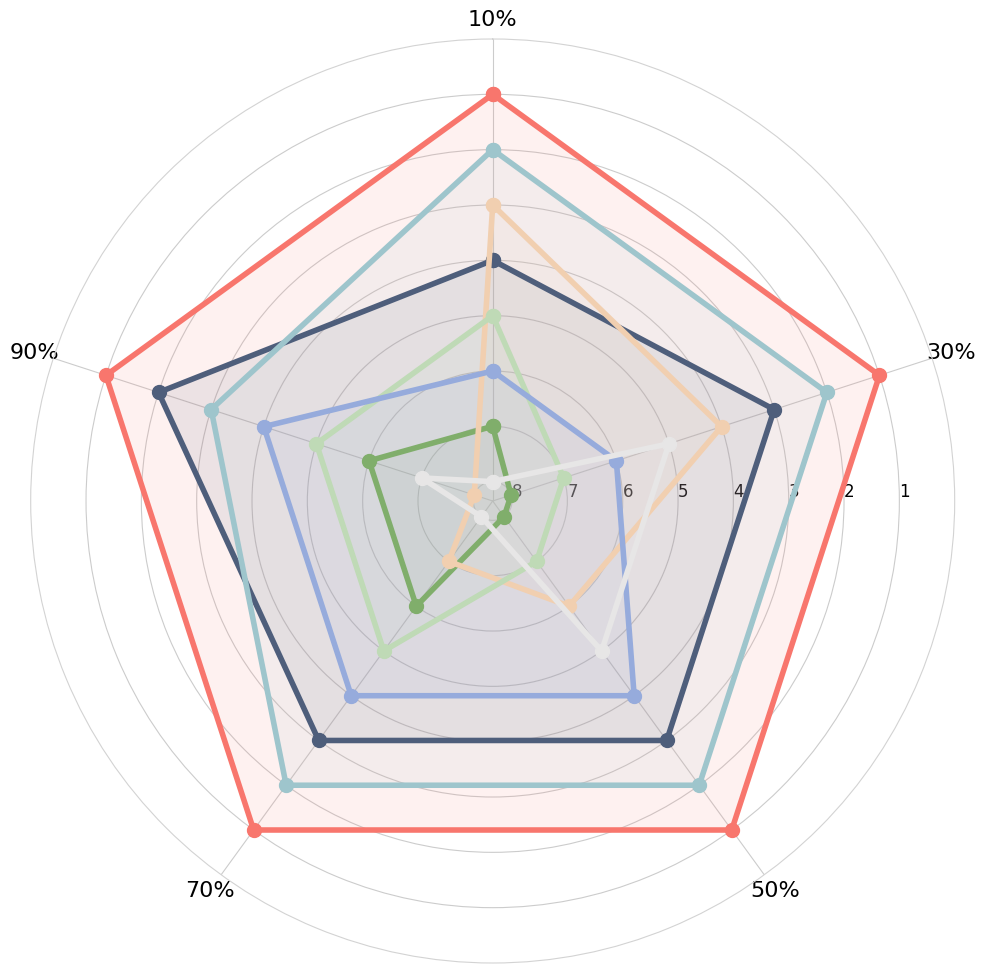

In [17]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

[[0, 0, 0.0359], [1, 0, 0.0406], [2, 0, 0.0492], [3, 0, 0.0689], [4, 0, 0.1258], [4, 0, 0], [3, 0, 0], [2, 0, 0], [1, 0, 0], [0, 0, 0]]
[[0, 1, 0.0517], [1, 1, 0.0614], [2, 1, 0.0826], [3, 1, 0.1202], [4, 1, 0.1784], [4, 1, 0], [3, 1, 0], [2, 1, 0], [1, 1, 0], [0, 1, 0]]
[[0, 2, 0.1708], [1, 2, 0.1606], [2, 2, 0.1563], [3, 2, 0.1562], [4, 2, 0.1491], [4, 2, 0], [3, 2, 0], [2, 2, 0], [1, 2, 0], [0, 2, 0]]
[[0, 3, 0.2274], [1, 3, 0.2276], [2, 3, 0.2345], [3, 3, 0.2556], [4, 3, 0.3148], [4, 3, 0], [3, 3, 0], [2, 3, 0], [1, 3, 0], [0, 3, 0]]
[[0, 4, 0.1564], [1, 4, 0.1883], [2, 4, 0.2258], [3, 4, 0.2701], [4, 4, 0.4994], [4, 4, 0], [3, 4, 0], [2, 4, 0], [1, 4, 0], [0, 4, 0]]
[[0, 5, 0.2108], [1, 5, 0.2187], [2, 5, 0.2297], [3, 5, 0.2479], [4, 5, 0.2975], [4, 5, 0], [3, 5, 0], [2, 5, 0], [1, 5, 0], [0, 5, 0]]
[[0, 6, 0.2159], [1, 6, 0.218], [2, 6, 0.2219], [3, 6, 0.2321], [4, 6, 0.2834], [4, 6, 0], [3, 6, 0], [2, 6, 0], [1, 6, 0], [0, 6, 0]]
[[0, 7, 0.2299], [1, 7, 0.2137], [2, 7, 0.2237], 

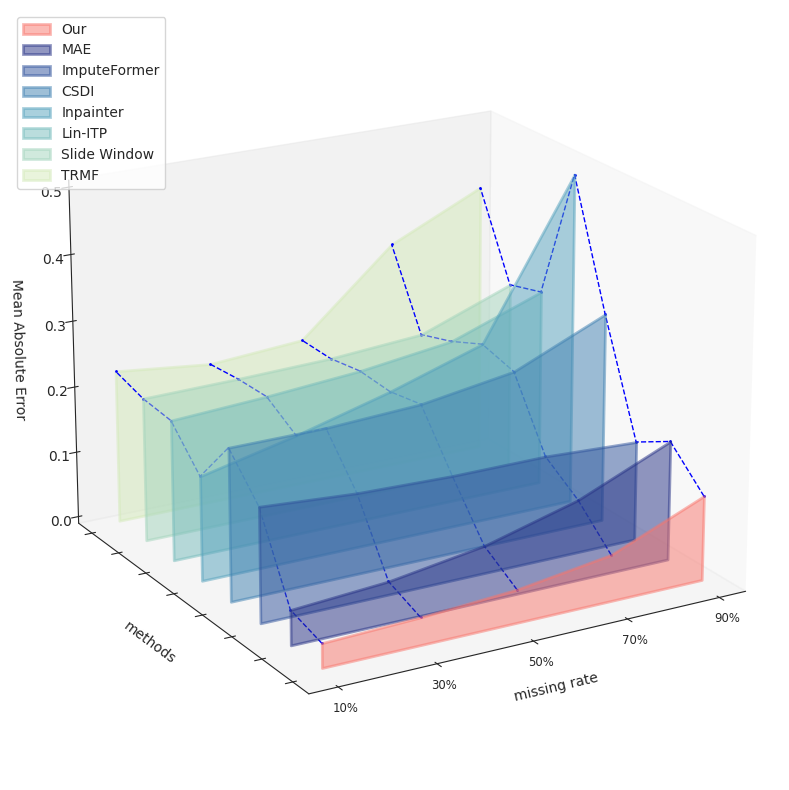

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns

sns.set_style("white")

methods = ["Our", "MAE", "ImputeFormer", "CSDI", "Inpainter", "Lin-ITP", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0359, 0.0406, 0.0492, 0.0689, 0.1258],
                  [0.0517, 0.0614, 0.0826, 0.1202, 0.1784],
                  [0.1708, 0.1606, 0.1563, 0.1562, 0.1491],
                  [0.2274, 0.2276, 0.2345, 0.2556, 0.3148],
                  [0.1564, 0.1883, 0.2258, 0.2701, 0.4994],
                  [0.2108, 0.2187, 0.2297, 0.2479, 0.2975],
                  [0.2159, 0.2180, 0.2219, 0.2321, 0.2834],
                  [0.2299, 0.2137, 0.2237, 0.3463, 0.4101]])

# 数据准备
y = np.arange(len(methods))
x = np.arange(len(metrics))

# 创建网格
x, y = np.meshgrid(x, y)

# 创建图形
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
# color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]
color_palette = ["#F8766D", "#263185", "#30539C", "#3F80B1", "#55A2BD", "#76BCBC", "#A3D4BC", "#D4EABA"]
# 绘制线框图
for i in range(value.shape[0]):
    tmp1 = [ list(j) for j in zip(x[i],y[i],value[i])]
    tmp2 = [ list(j) for j in zip(x[i], y[i], np.zeros_like(x[i]))]
    verts = tmp1 + tmp2[::-1]
    print(verts)
    ax.add_collection3d(Poly3DCollection([np.array(verts)], alpha=0.5, linewidth=2, color=color_palette[i],label=methods[i]))

for i in range(value.shape[1]):
    ax.plot(x[:,i], y[:, i], value[:,i], color='blue', marker='o', markersize=1, linestyle='--',linewidth=1)
    
    # ax.plot(Round[i] * np.ones_like(A1), A1, Coop_rate[:, i], color='black', marker='o', markersize=5, linestyle='-')
    # ax.fill_between(Round[i] * np.ones_like(A1), A1, Coop_rate[:, i], color='black', marker='o', markersize=5, linestyle='-')

# 设置轴标签和标题
ax.set_ylabel('methods')
ax.set_xlabel('missing rate')
ax.set_zlabel("Mean Absolute Error")
ax.set_xticks(np.arange(len(metrics)))
ax.set_yticks(np.arange(len(methods)))
ax.tick_params(axis='both', which='major', pad=0)
ax.set_xticklabels(metrics,  fontsize="small")
ax.set_yticklabels([],  fontsize="small", rotation=10)
ax.view_init(20,240)
ax.set_zlim(0,0.5)
ax.grid(False)

plt.legend(loc=2, prop={'size': 10})
# 显示图形   
plt.show()